In [11]:
# Load LIbraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [12]:
# Upload Dataset into the notebook
airline=pd.read_csv("D:\CSV FIles Path\Assignments\Clustering\EastWestAirlines1.csv")
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [13]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


## Perform EDA

In [14]:
# Check the ROWS and Columns in the dataset
airline.shape

(3999, 12)

In [15]:
# Check any duplicate Row
airline[airline.duplicated()].shape

(0, 12)

In [16]:
# Normalization function for Scaling
def minmax_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [17]:
# Normalized data frame (considering the numerical part of data)
df_norm = minmax_func(airline.iloc[:,1:])

In [18]:
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


## 4 Methods to create Dendogram: 'Complete','Single','Average','Centroid'

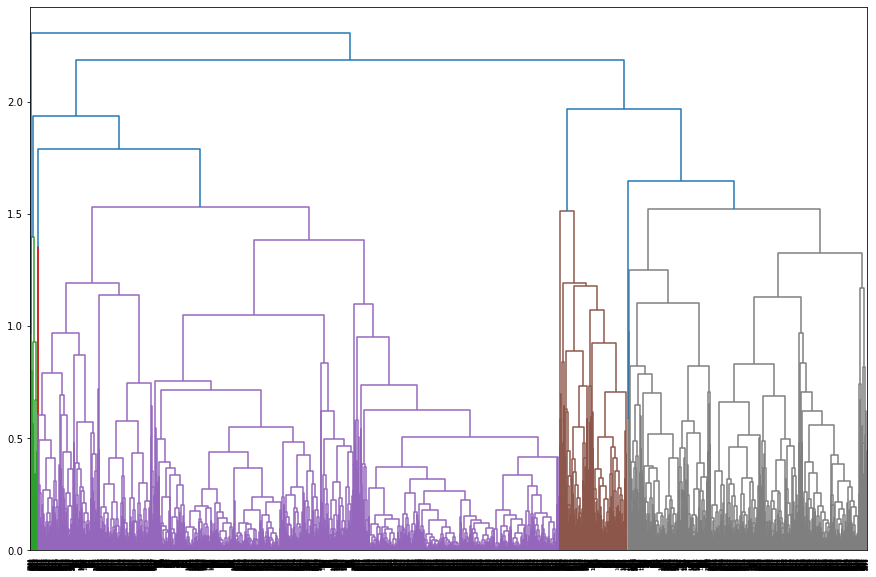

In [19]:
# Create Dendrogram using various Linkage Method.
plt.figure(figsize=(15, 10)) 
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))



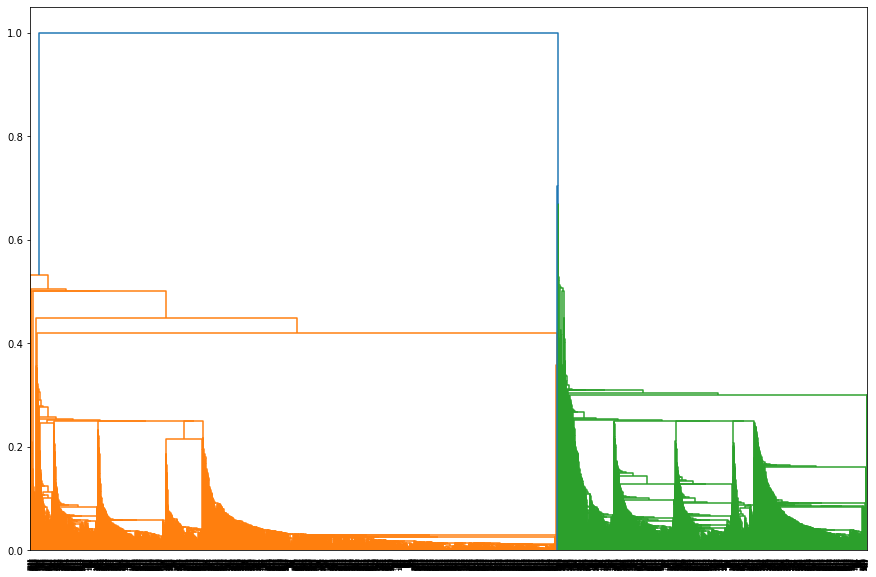

In [20]:
# Create Dendrogram using SINGLE Linkage Method.
plt.figure(figsize=(15, 10)) 
DENDO = sch.dendrogram(sch.linkage(df_norm, method='single'))

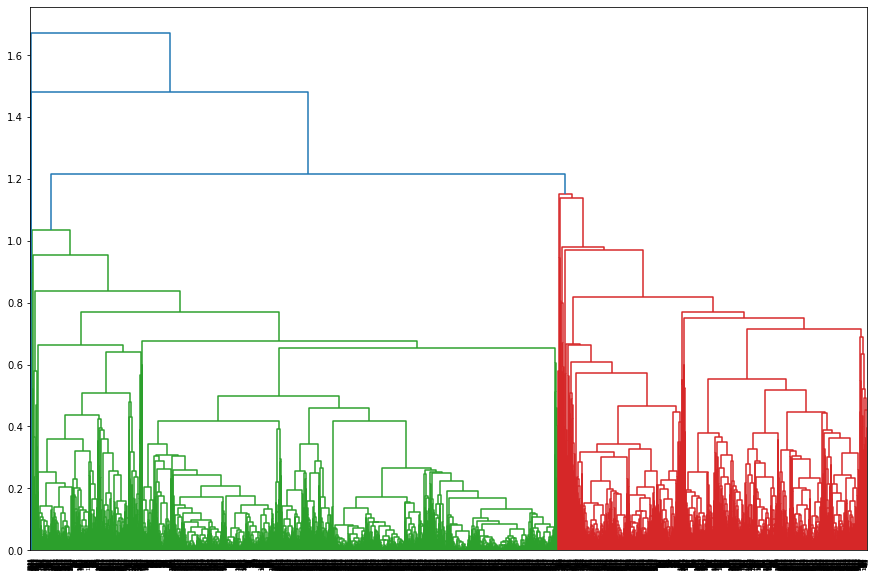

In [21]:
# Create Dendrogram using Average Linkage Method.
plt.figure(figsize=(15, 10)) 
DENDO1 = sch.dendrogram(sch.linkage(df_norm, method='average'))

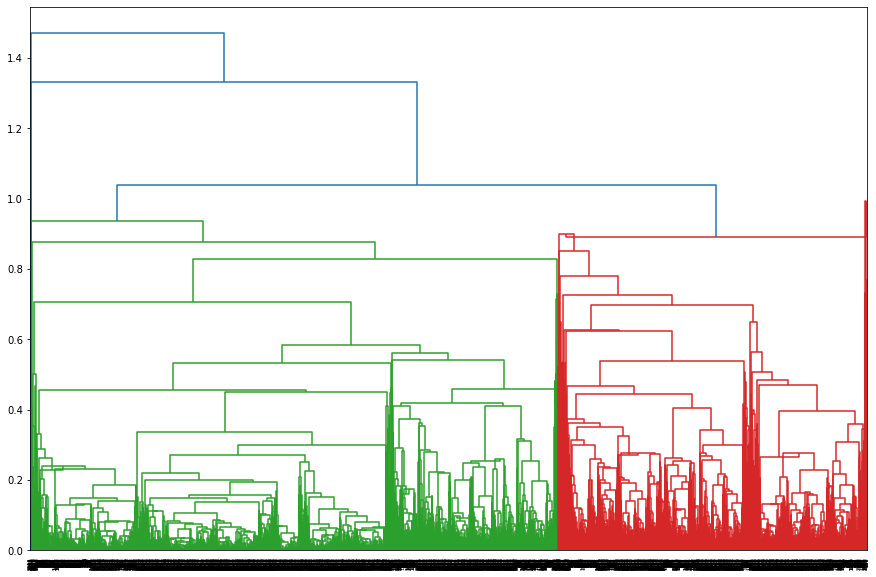

In [22]:
# Create Dendrogram using Centroid Linkage Method.
plt.figure(figsize=(15, 10)) 
DENDO2 = sch.dendrogram(sch.linkage(df_norm, method='centroid'))

## Create HIERARCHICAL CLUSTERING based on "COMPLETE LINKAGE METHOD" 

In [23]:
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'complete')
hc

AgglomerativeClustering(linkage='complete', n_clusters=5)

## Save Clusters for Analysis and Chart

In [24]:
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Cluster ID'])

In [25]:
# Check no. of records under each Cluster ID
Clusters.value_counts()

Cluster ID
0             2495
2             1144
1              325
4               31
3                4
dtype: int64

## Add Clusters to our Scaled Dataset

In [26]:
df_norm['Cluster ID'] = y_hc
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster ID
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0,2
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0,2
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0,2
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0,0


## Adding Clusters to the Original Dataset

In [32]:
airline['Cluster ID'] = y_hc
airline

,Cluster ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0,28143,0,1,1,1,174,1,0,0,7000,0
1,0,19244,0,1,1,1,215,2,0,0,6968,0
2,0,41354,0,1,1,1,4123,4,0,0,7034,0
3,0,14776,0,1,1,1,500,1,0,0,6952,0
4,1,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,2,18476,0,1,1,1,8525,4,200,1,1403,1
3995,2,64385,0,1,1,1,981,5,0,0,1395,1
3996,2,73597,0,3,1,1,25447,8,0,0,1402,1
3997,0,54899,0,1,1,1,500,1,500,1,1401,0


In [33]:
# shift column 'Cluster ID' to first position
first_column = airline.pop('Cluster ID')

In [34]:
# insert column using insert(position,column_name,first_column) function
airline.insert(0, 'Cluster ID', first_column)

In [43]:
# Drop Column "Unique ID" from the origianl Dataset
#airline=airline.drop(['ID#'],axis=1)
#airline

## Check no. of records under each Cluster ID

In [46]:
Clusters.value_counts()

Cluster ID
0             2495
2             1144
1              325
4               31
3                4
dtype: int64

In [42]:
(2495+1144+325+31+4)

3999

In [47]:
# Caclculate the amount of data in Cluster no. 0.
(2495/3999)*100

62.39059764941235

In [48]:
# Caclculate the amount of data in Cluster 2.
(1144/3999)*100

28.60715178794699

## Group Clusters based on each features Average

In [49]:
airline.groupby('Cluster ID').agg(['mean']).T

,Cluster ID,0,1,2,3,4
Balance,mean,59968.433667,157084.578462,80173.963287,131999.50,45515.064516
Qual_miles,mean,88.883768,208.673846,248.550699,347.00,32.258065
cc1_miles,mean,1.712224,4.661538,2.104895,2.50,1.000000
cc2_miles,mean,1.000401,1.000000,1.009615,1.00,2.483871
cc3_miles,mean,1.011222,1.061538,1.000874,1.00,1.000000
Bonus_miles,mean,10271.530261,70477.086154,16882.864510,65634.25,14618.870968
Bonus_trans,mean,9.105812,23.249231,13.412587,69.25,16.129032
Flight_miles_12mo,mean,227.797194,1019.433846,739.958916,19960.00,443.225806
Flight_trans_12,mean,0.656112,3.196923,2.236888,49.25,1.967742
Days_since_enroll,mean,3825.392786,5770.572308,4304.383741,2200.25,3784.258065


## Inference: 90% of the data is falling into 2 clusters, and looking at the magnitude of data, we can attempt another method of Clustering to get the best results.